# Feature Visualization: City Profile Generator

### Import required packages

In [1]:
# Notebook display
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
from pandas.io.formats.style import Styler
import ipywidgets as widgets
import warnings

# General Python
import os

# Data storage and manipulation
import numpy as np
import pandas as pd

# Graphing

import matplotlib.pyplot as plt
import seaborn as sns
from splot.esda import moran_scatterplot
import pysal
from esda import Moran_Local
from scipy.stats import gmean
from splot.esda import lisa_cluster

# Geographies
import geopandas as gpd
from shapely.geometry import Point
import descartes

# Sklearn
from sklearn.preprocessing import StandardScaler

C:\Users\greer\anaconda3\envs\Launa\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\greer\anaconda3\envs\Launa\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


### Configure standard settings for graph display

In [2]:
# Configure standard settings for graph display
%matplotlib inline
sns.set(rc={'figure.figsize':(25, 4)})
title_font_dict = {'fontsize': 20, 'fontweight' : 'bold'}
axes_font_dict = {'fontsize': 18, 'fontweight' : 'bold'}

In [3]:
%%html
<style>
.city > .widget-label {
    font-weight: bold;
    font-size: 16px;
}
.widget-radio-box > label {
    font-size: 16px;
}
</style>

In [4]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
warnings.filterwarnings('ignore')

### Define functions

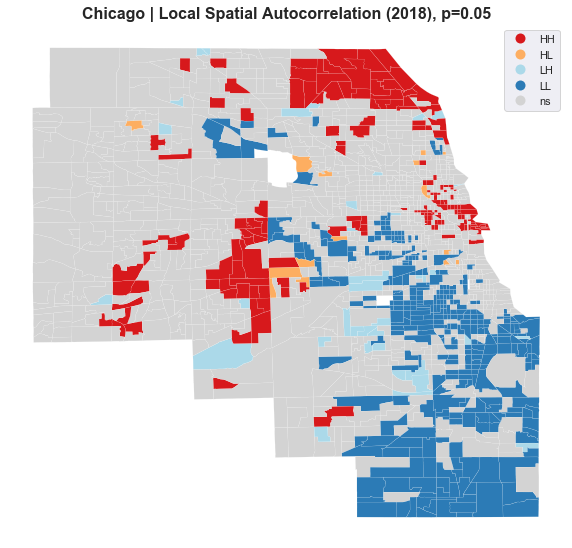

In [333]:
fig, ax = lisa_cluster(clusters[8][0], clusters[8][1], p=0.05, figsize=(10,10))
ax.set_title("Chicago | Local Spatial Autocorrelation (2018), p=0.05", fontsize=16, fontweight="bold")
plt.savefig("mapped_moran.png", dpi="figure", bbox_inches='tight', pad_inches = 0)

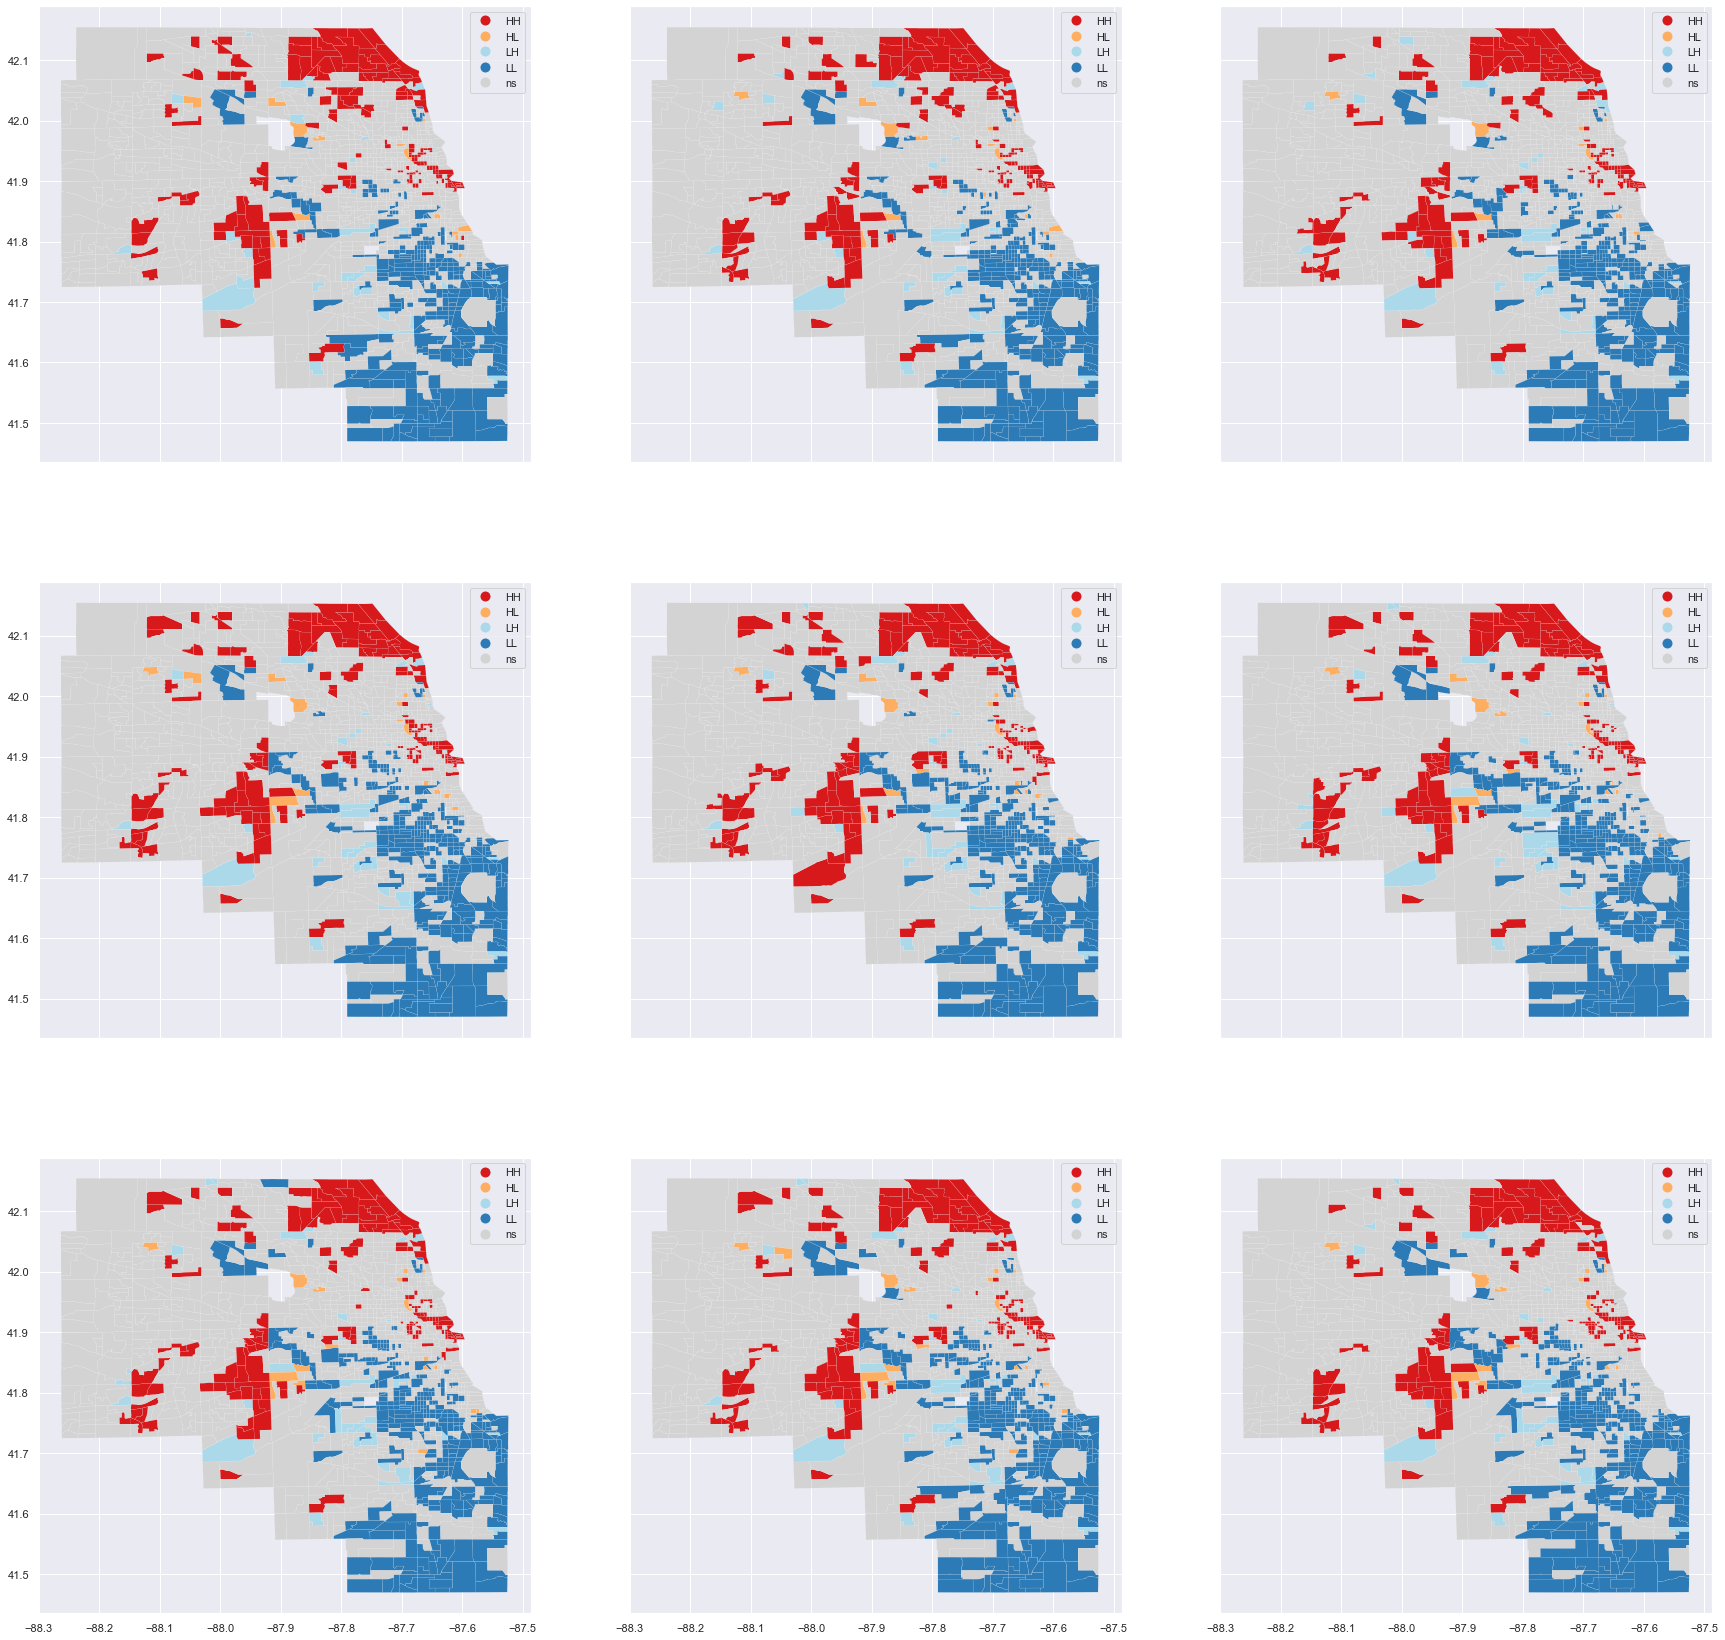

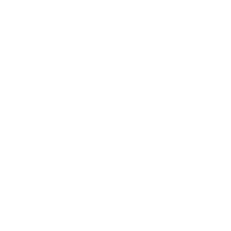

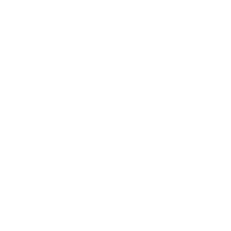

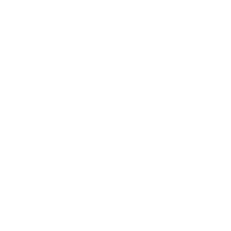

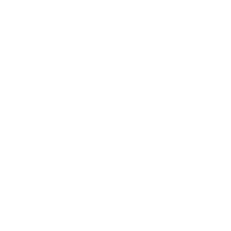

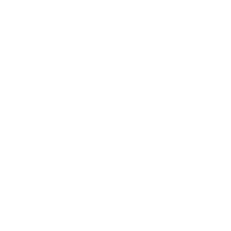

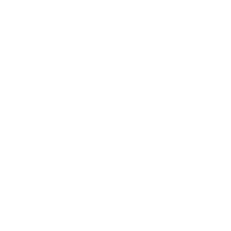

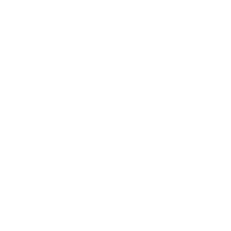

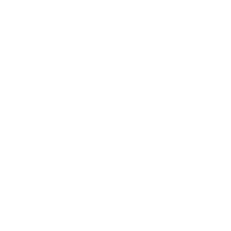

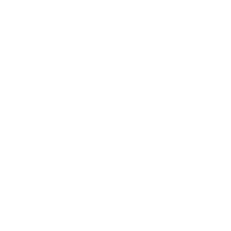

In [314]:
# Make plots
col_name = "Median Value for Owner Occupied Housing Units"
fig, axes_grid = plt.subplots(3, 3, sharex='all', sharey='all', figsize=(30,30))
#plt.subplots_adjust(wspace=0.05, right = 0.5, top=0.45)
axes_dict = {}
axes_dict[2010] = axes_grid[0][0]
axes_dict[2011] = axes_grid[0][1]
axes_dict[2012] = axes_grid[0][2]
axes_dict[2013] = axes_grid[1][0]
axes_dict[2014] = axes_grid[1][1]
axes_dict[2015] = axes_grid[1][2]
axes_dict[2016] = axes_grid[2][0]
axes_dict[2017] = axes_grid[2][1]
axes_dict[2018] = axes_grid[2][2]
    
year = 2010

for m, g in clusters:
    lisa_cluster(m, g, p=0.05, axes=axes_dict[year])
    x_label = axes_dict[year].get_xaxis().get_label().set_visible(False)
    y_label = axes_dict[year].get_yaxis().get_label().set_visible(False)
    title = axes_dict[year].set_title("")
    year += 1

# add a big axis, hide frame
#ax_invis = fig.add_subplot(111, frameon=False)
#ax_invis.grid(False)

# hide tick and tick label of the big axis
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.xlabel("Median Housing Value", fontsize=15, fontweight="bold")
#plt.ylabel("Spatial Lag of Median Housing Value", fontsize=15, fontweight="bold")

### Load output files

In [13]:
df_dict = {}
years = list(range(2010, 2019))
output_folder_path = "../acs/outputs"

for year in years:
    df_dict[year] = pd.read_csv(f"{output_folder_path}/acs5_{year}_features.csv")

### Configure city

In [101]:
w = widgets.RadioButtons(
    options=df_dict[2010]["Affiliated City"].sort_values().unique(),
    value='Chicago',
    layout={'width': 'max-content'},
    description='City',
    disabled=False
)
w.add_class("city")

RadioButtons(_dom_classes=('city',), description='City', index=6, layout=Layout(width='max-content'), options=…

# City Profile: {{w.value}} 

## Data Preparation

In [234]:
# Retrieve city
city_name = w.value
city_df = retrieve_city(df_dict, years, city_name)

# Clean city
city_df = clean_city(city_df)

# Join city to shapefile to create GeoDataFRame
city_gdf, weights = join_city_with_shapefile(city_df)

# Preview data
len(city_df)

Dropping the following 39 unpopulated tracts across all years:

17031381700, 17031835700, 17031980000, 17031980100, 17031990000, 17031381700, 17031835700, 17031980000, 17031980100, 17031990000, 17031381700, 17031835700, 17031980000, 17031980100, 17031990000, 17031381700, 17031980000, 17031980100, 17031990000, 17031381700, 17031980000, 17031980100, 17031990000, 17031980000, 17031980100, 17031990000, 17031381700, 17031381700, 17031980000, 17031980100, 17031990000, 17031990000, 17031980000, 17031381700, 17031980100, 17031381700, 17031980000, 17031980100, 17031990000

45 total rows dropped, leaving 13770 left


13770

## Age

count   mean    std    min    25%    50%  \
Median Age                    13770.000 36.725  6.690  8.800 31.800 36.400   
Female Median Age             13770.000 37.963  7.461 14.500 32.300 37.600   
Male Median Age               13769.000 35.324  6.722  5.600 30.800 35.100   
White Median Age              13104.000 39.801  9.529  1.500 33.200 39.400   
Black Median Age              12121.000 35.672 12.296  0.000 27.700 34.700   
Asian Median Age               9911.000 38.558 11.198  1.900 31.600 37.100   
Hispanic or Latino Median Age 12801.000 29.879  9.836  0.000 24.700 28.700   

                                 75%    max  
Median Age                    41.200 66.800  
Female Median Age             43.000 76.100  
Male Median Age               39.800 61.000  
White Median Age              44.800 90.300  
Black Median Age              42.800 90.500  
Asian Median Age              43.900 88.500  
Hispanic or Latino Median Age 33.800 88.500

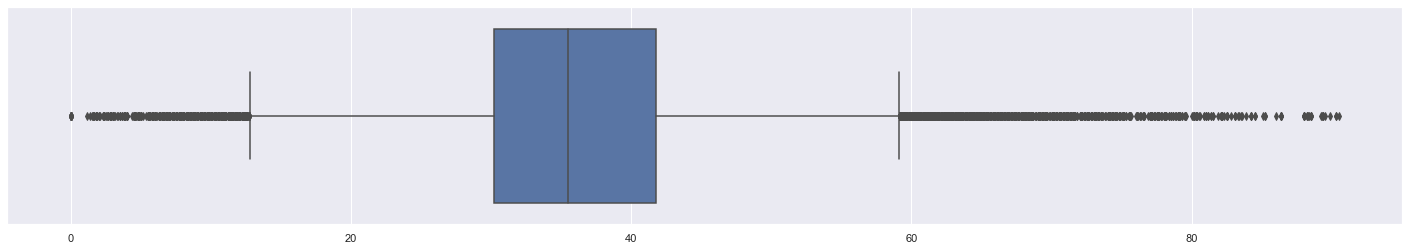

In [141]:
dem_vars = [
    "Median Age",
    "Female Median Age",
    "Male Median Age",
    "White Median Age",
    "Black Median Age",
    "Asian Median Age",
    "Hispanic or Latino Median Age"
]
subset = city_gdf[dem_vars]
display(HTML("<h3>Statistics for All Tracts and Years</h3>"))
display(subset.describe().transpose())
sns.boxplot(x=subset)

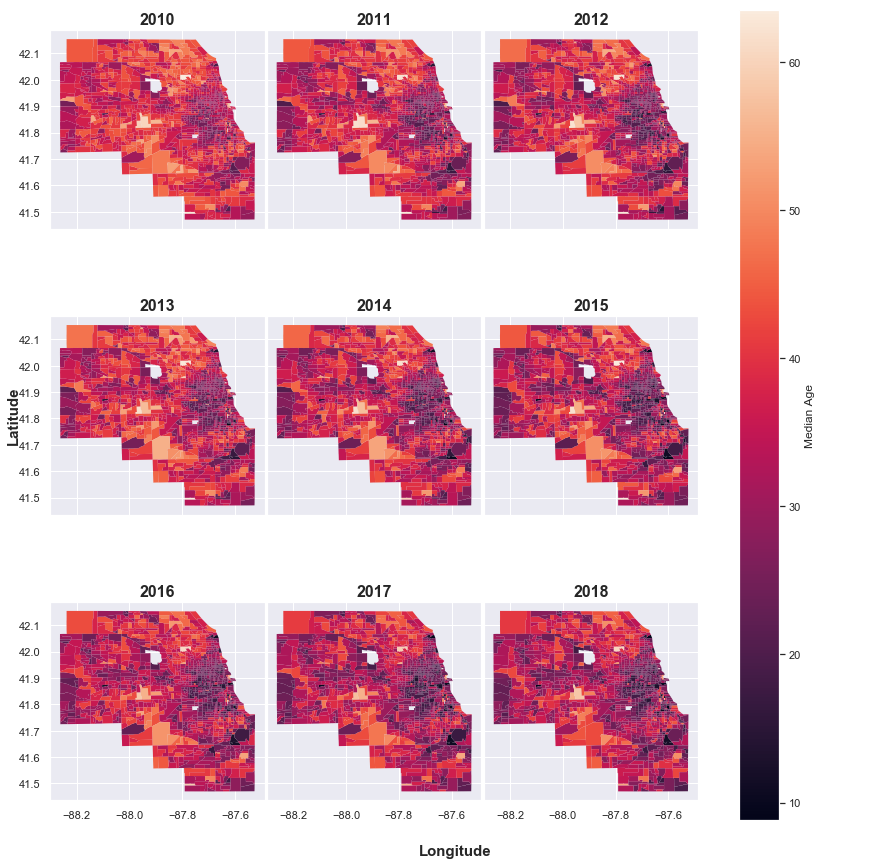

In [142]:
plot_map_time_lapse(city_gdf, "Median Age")

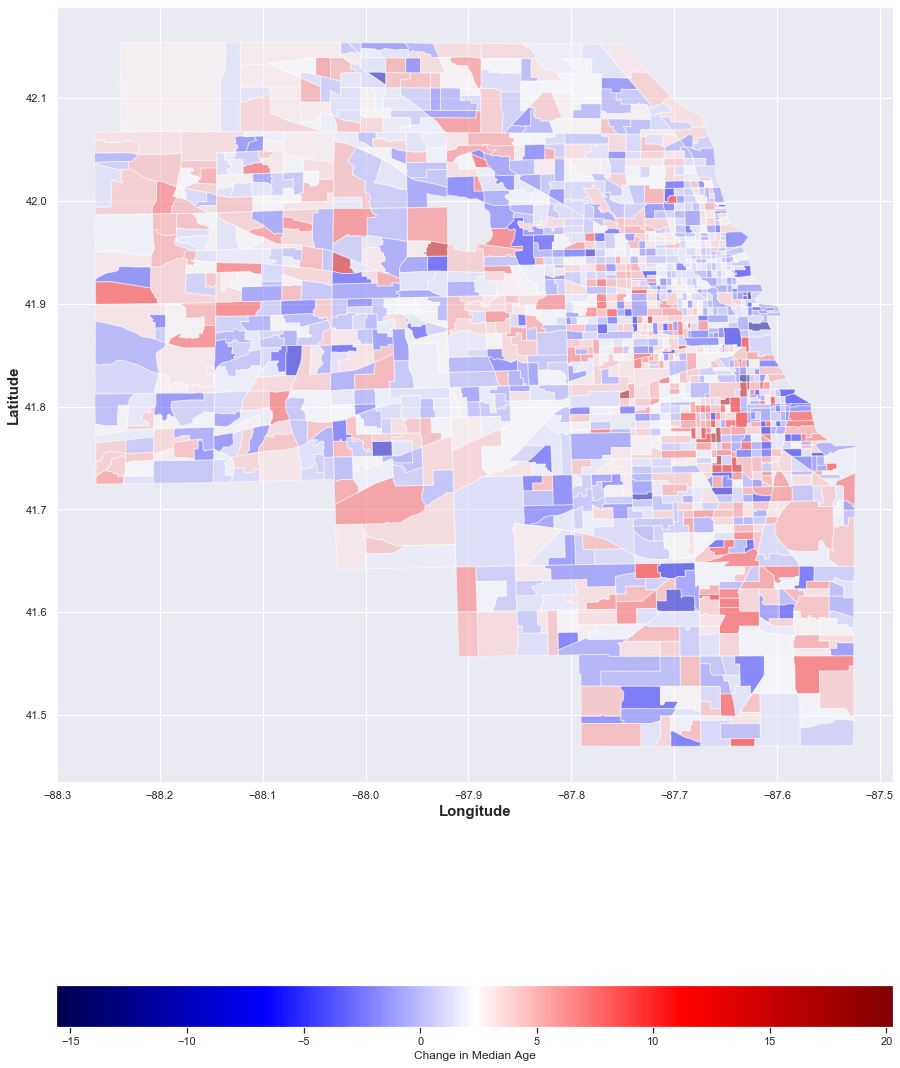

In [143]:
display_choropleth_map(city_gdf, "Median Age", 2010, 2018)

## Race

In [144]:
race_vars = [
    "Percent White",
    "Percent Black",
    "Percent American Indian and Alaska Native",
    "Percent Asian",
    "Percent Native Hawaiian and Other Pacific Islander",
    "Percent Other Race",
    "Percent Multiracial",
    "Percent Hispanic"
]
subset = city_gdf[race_vars]
display(HTML("<h3>Statistics for All Tracts and Years</h3>"))
display(subset.describe().transpose())

count  mean   std  \
Percent White                                      13770.000 0.445 0.320   
Percent Black                                      13770.000 0.255 0.355   
Percent American Indian and Alaska Native          13770.000 0.001 0.004   
Percent Asian                                      13770.000 0.066 0.090   
Percent Native Hawaiian and Other Pacific Islander 13770.000 0.000 0.002   
Percent Other Race                                 13770.000 0.002 0.006   
Percent Multiracial                                13770.000 0.014 0.015   
Percent Hispanic                                   13770.000 0.216 0.254   

                                                     min   25%   50%   75%  \
Percent White                                      0.000 0.094 0.486 0.746   
Percent Black                                      0.000 0.015 0.050 0.420   
Percent American Indian and Alaska Native          0.000 0.000 0.000 0.000   
Percent Asian                                      0.000 0.004 0.033 0.092   
Percent Native Hawaiian and Other Pacific Islander 0.000 0.000 0.000 0.000   
Percent Other Race                                 0.000 0.000 0.000 0.000   
Percent Multiracial                                0.000 0.003 0.010 0.021   
Percent Hispanic                                   0.000 0.042 0.105 0.290   

                                                     max  
Percent White                                      0.982  
Percent Black                                      1.000  
Percent American Indian and Alaska Native          0.077  
Percent Asian                                      0.898  
Percent Native Hawaiian and Other Pacific Islander 0.057  
Percent Other Race                                 0.106  
Percent Multiracial                                0.152  
Percent Hispanic                                   1.000

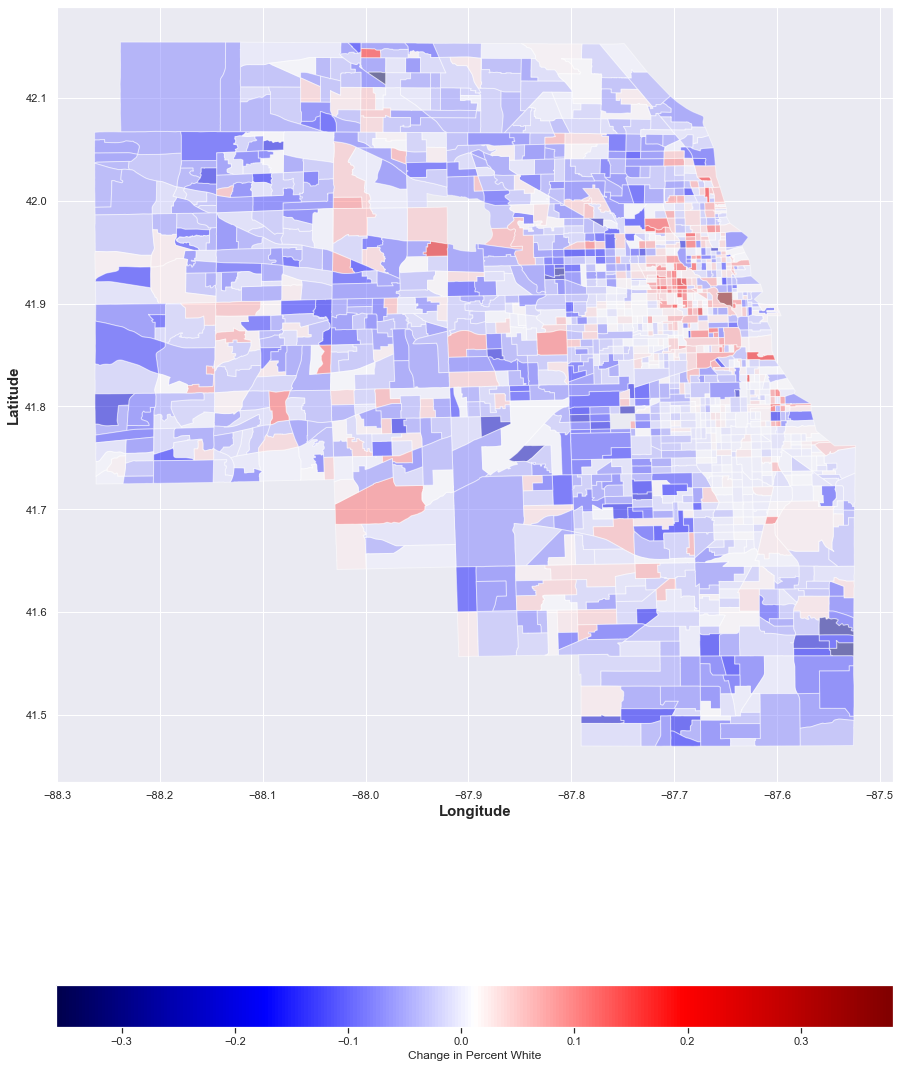

In [145]:
display_choropleth_map(city_gdf, "Percent White", 2010, 2018, "seismic")

## Median Annual Household Income

count    13766.000
mean     62277.372
std      31317.489
min       6696.000
25%      39893.000
50%      56707.000
75%      78843.250
max     250001.000
Name: Median Annual Household Income, dtype: float64

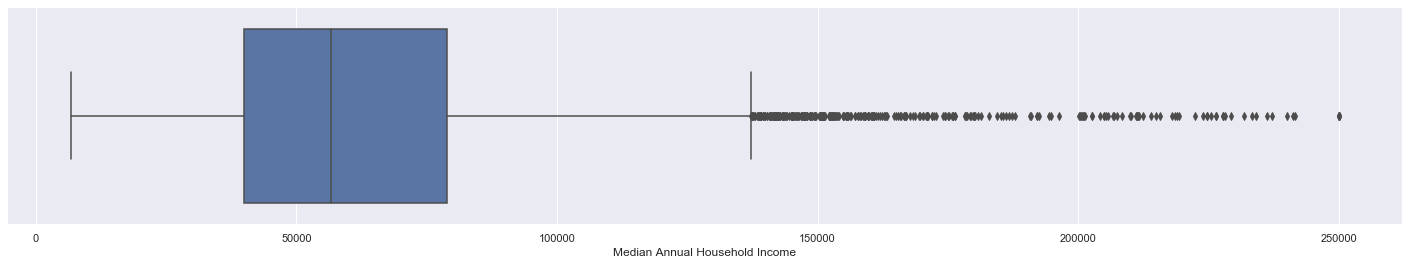

In [146]:
subset = city_gdf["Median Annual Household Income"]
display(HTML("<h3>Statistics for All Tracts and Years</h3>"))
display(subset.describe())
sns.boxplot(x=subset)

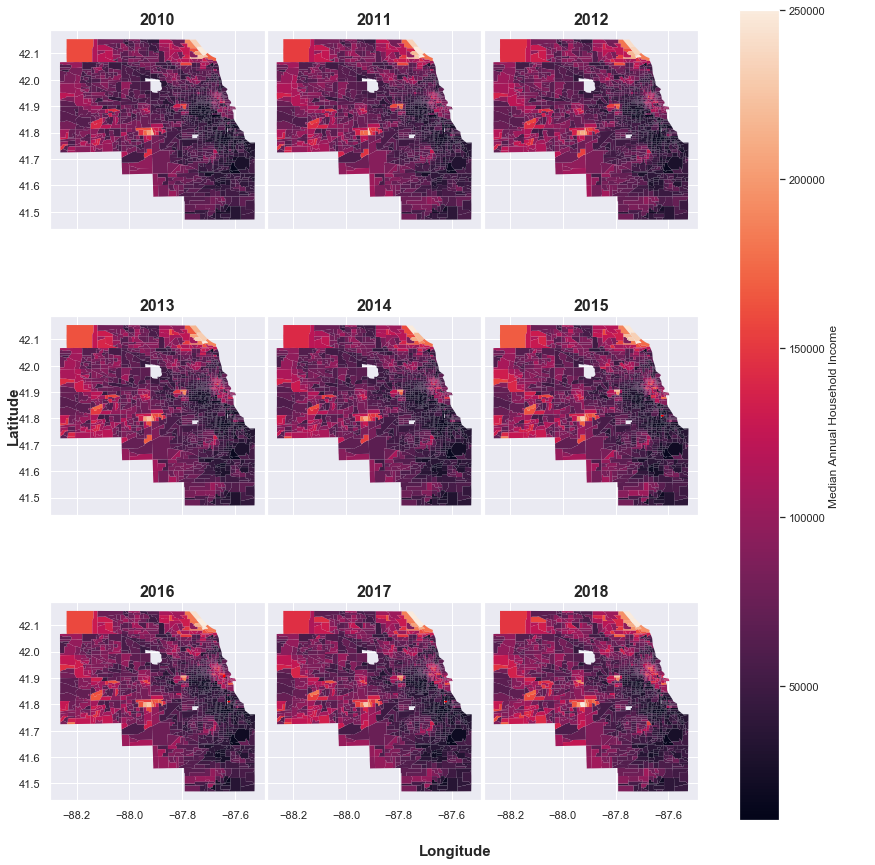

In [147]:
plot_map_time_lapse(city_gdf, "Median Annual Household Income")

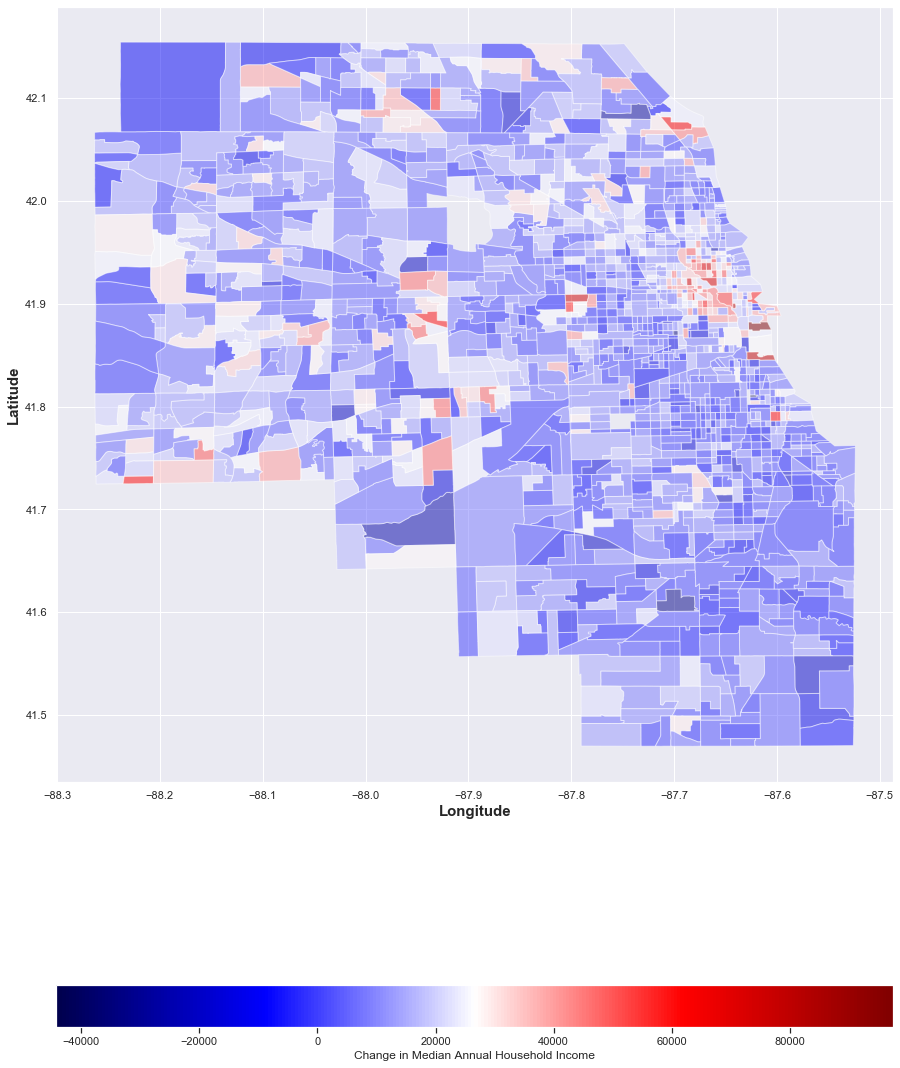

In [148]:
display_choropleth_map(city_gdf, "Median Annual Household Income", 2010, 2018, "seismic")

## Median Monthly Housing Costs

count   13770.000
mean     1288.128
std       440.714
min       247.000
25%       980.000
50%      1187.500
75%      1509.000
max      4001.000
Name: Median Monthly Housing Costs, dtype: float64

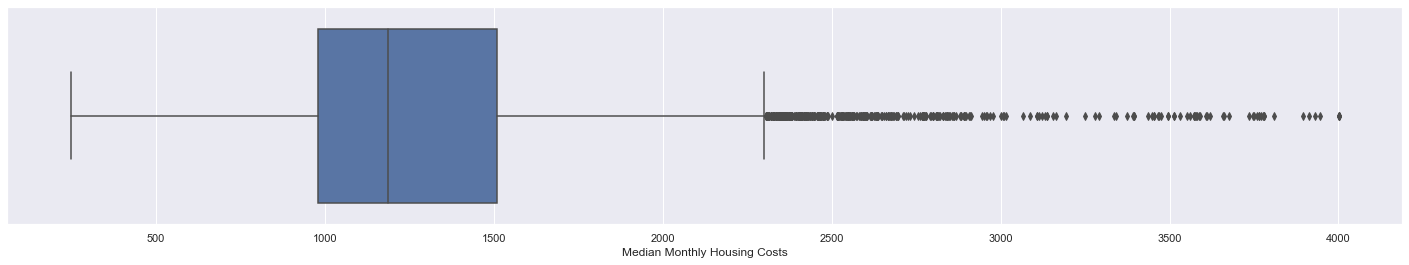

In [149]:
subset = city_gdf["Median Monthly Housing Costs"]
display(HTML("<h3>Statistics for All Tracts and Years</h3>"))
display(subset.describe())
sns.boxplot(x=subset)

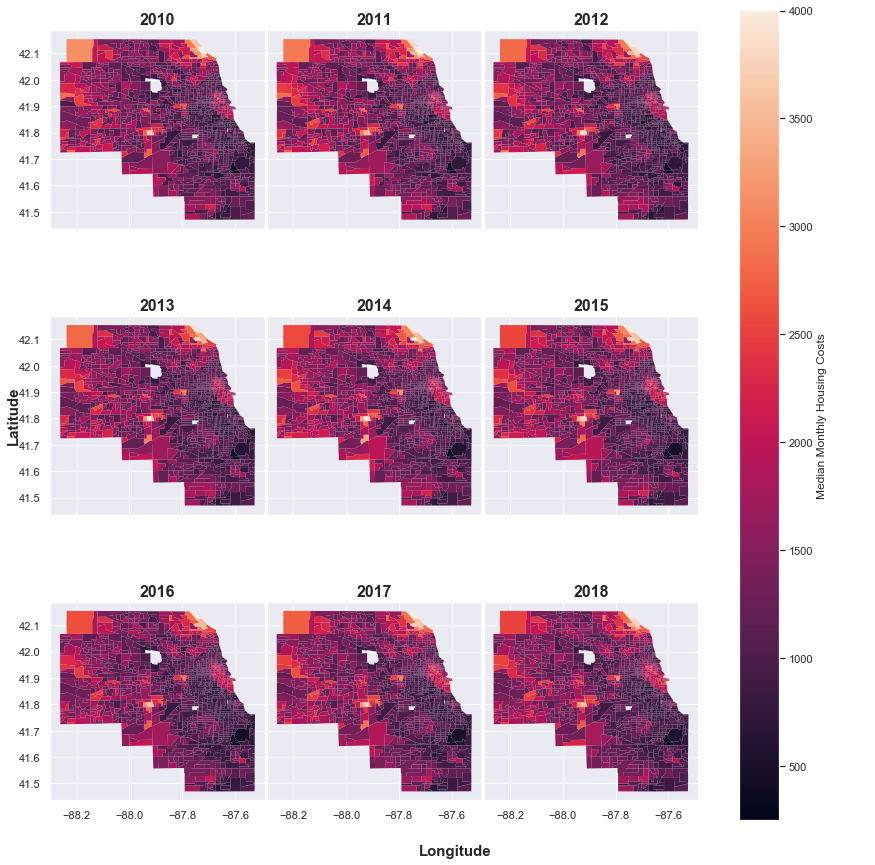

In [150]:
plot_map_time_lapse(city_gdf, "Median Monthly Housing Costs")

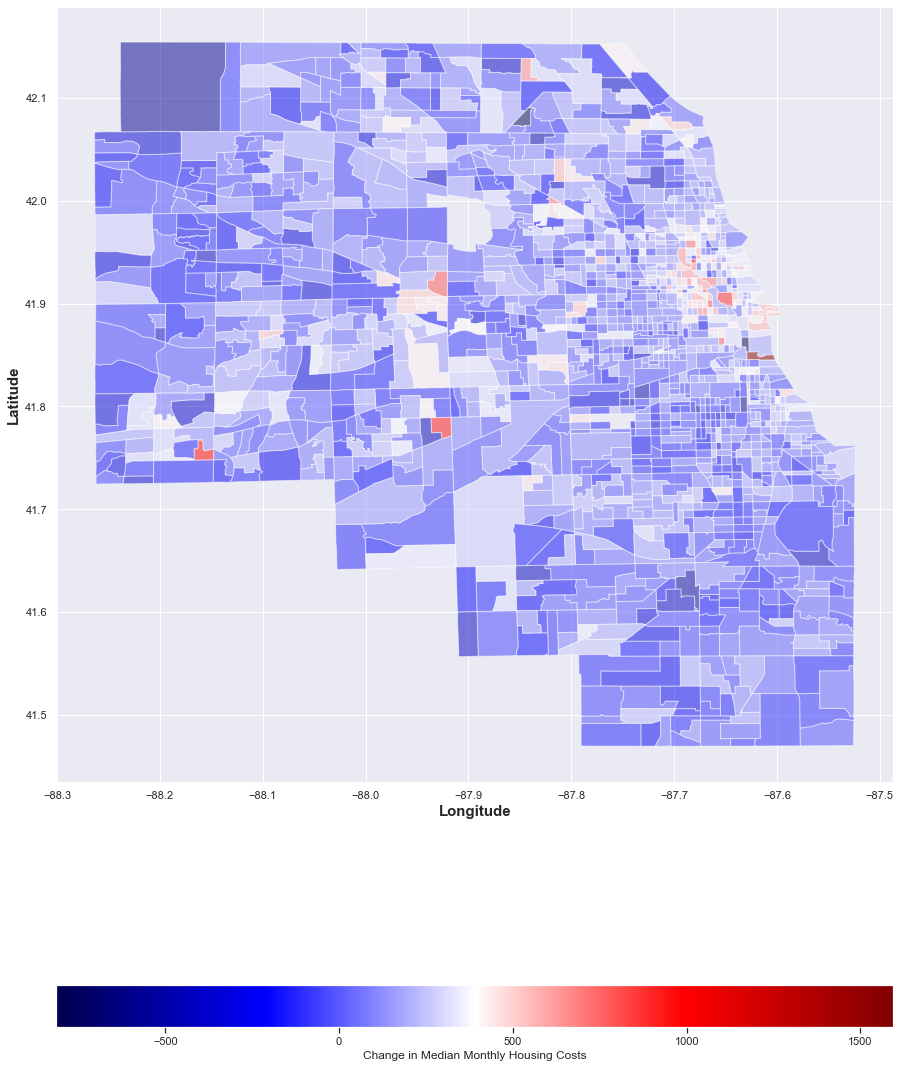

In [151]:
display_choropleth_map(city_gdf, "Median Monthly Housing Costs", 2010, 2018, "seismic")

## Percent White Collar

count   13770.000
mean        0.372
std         0.178
min         0.000
25%         0.226
50%         0.353
75%         0.510
max         0.848
Name: Percent White Collar, dtype: float64

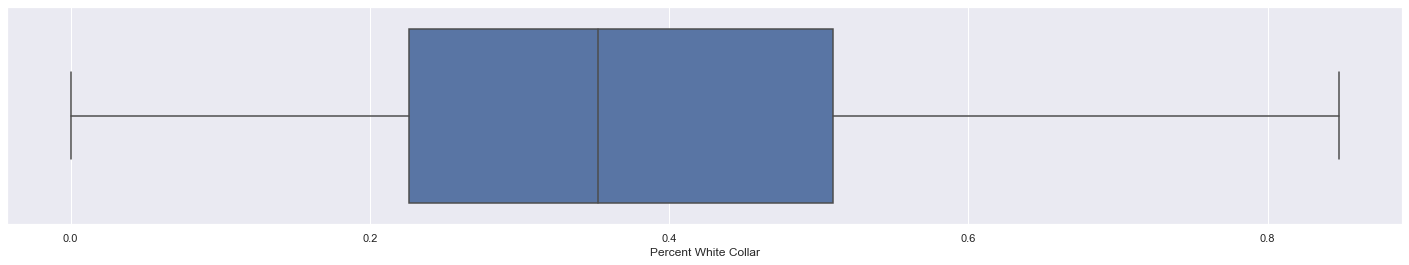

In [152]:
subset = city_gdf["Percent White Collar"]
display(HTML("<h3>Statistics for All Tracts and Years</h3>"))
display(subset.describe())
sns.boxplot(x=subset)

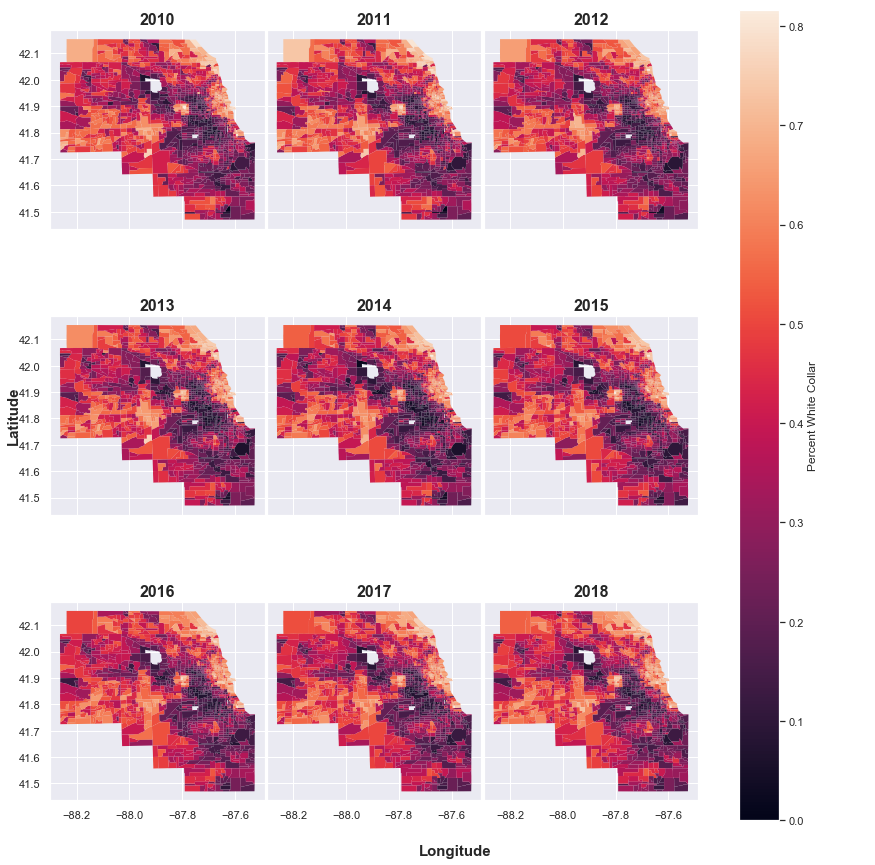

In [153]:
plot_map_time_lapse(city_gdf, "Percent White Collar")

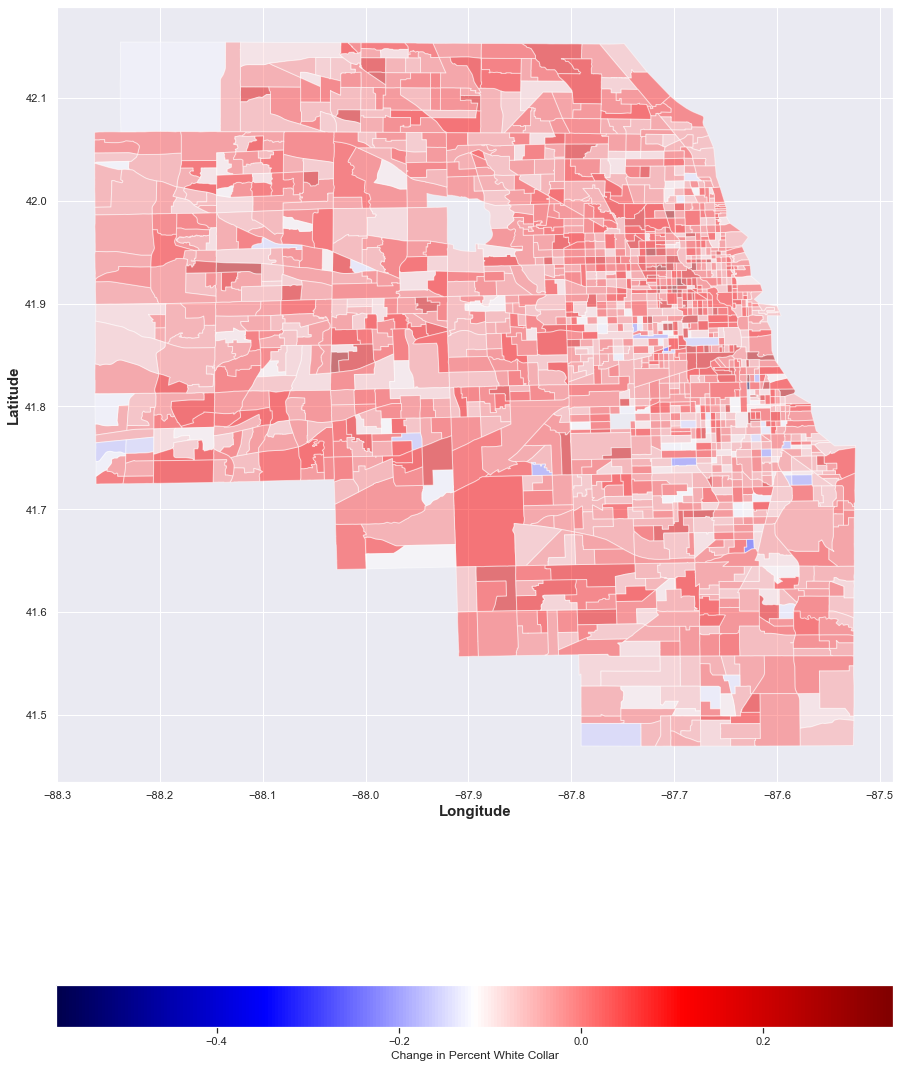

In [154]:
display_choropleth_map(city_gdf, "Percent White Collar", 2010, 2018, "seismic")

## Percent College Graduate

count   13770.000
mean        0.419
std         0.228
min         0.000
25%         0.224
50%         0.388
75%         0.589
max         0.975
Name: Percent College Graduate, dtype: float64

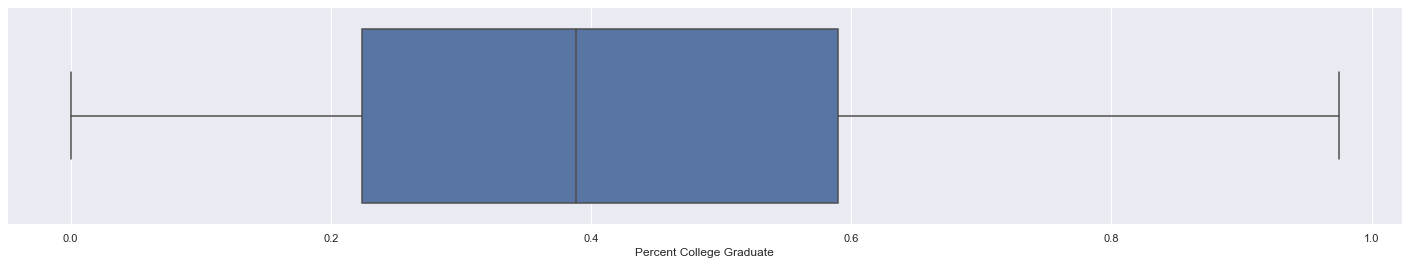

In [155]:
subset = city_gdf["Percent College Graduate"]
display(HTML("<h3>Statistics for All Tracts and Years</h3>"))
display(subset.describe())
sns.boxplot(x=subset)

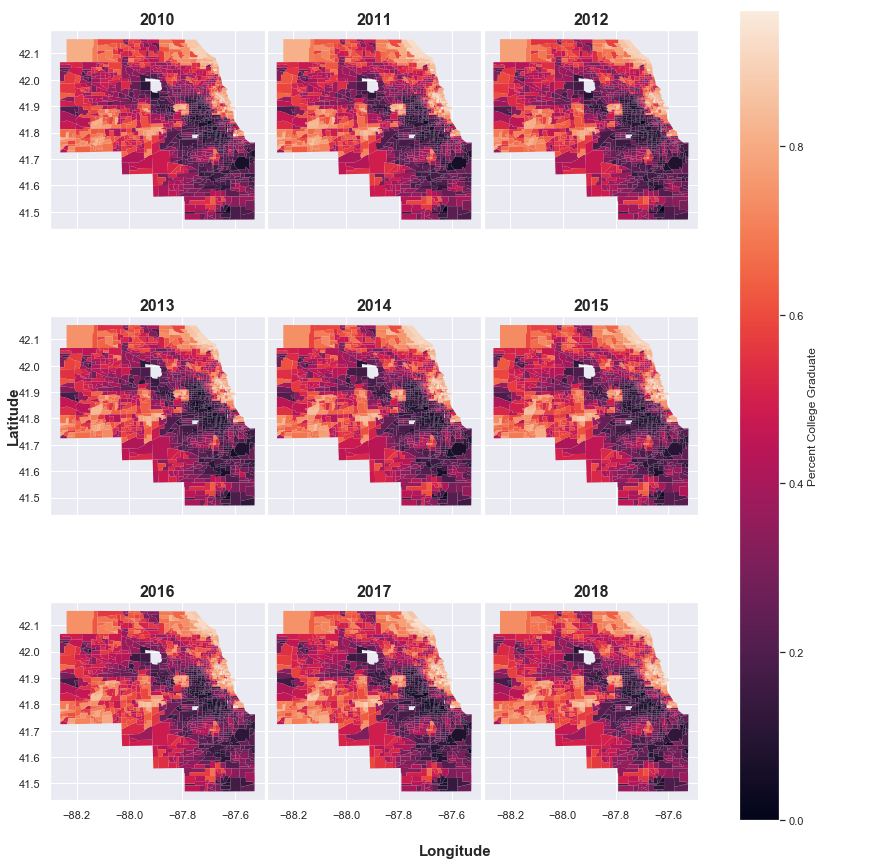

In [156]:
plot_map_time_lapse(city_gdf, "Percent College Graduate")

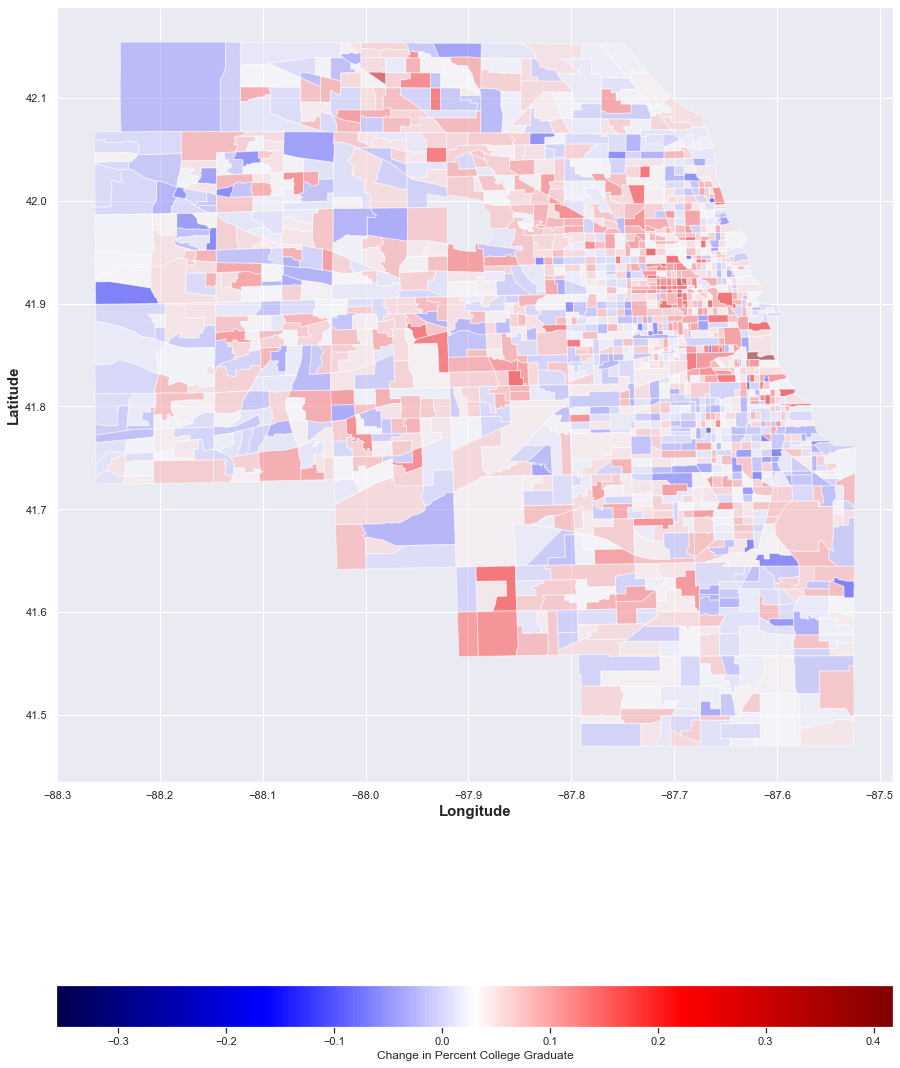

In [157]:
display_choropleth_map(city_gdf, "Percent College Graduate", 2010, 2018, "seismic")

## Median Value for Owner Occupied Housing Units

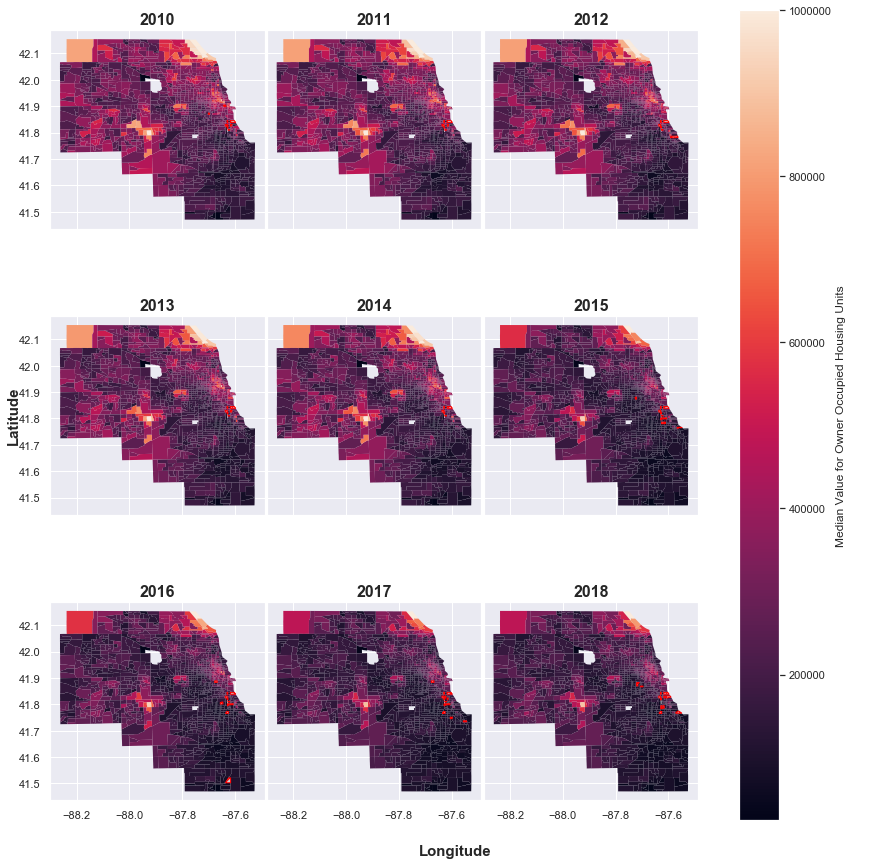

In [162]:
plot_map_time_lapse(city_gdf, "Median Value for Owner Occupied Housing Units")

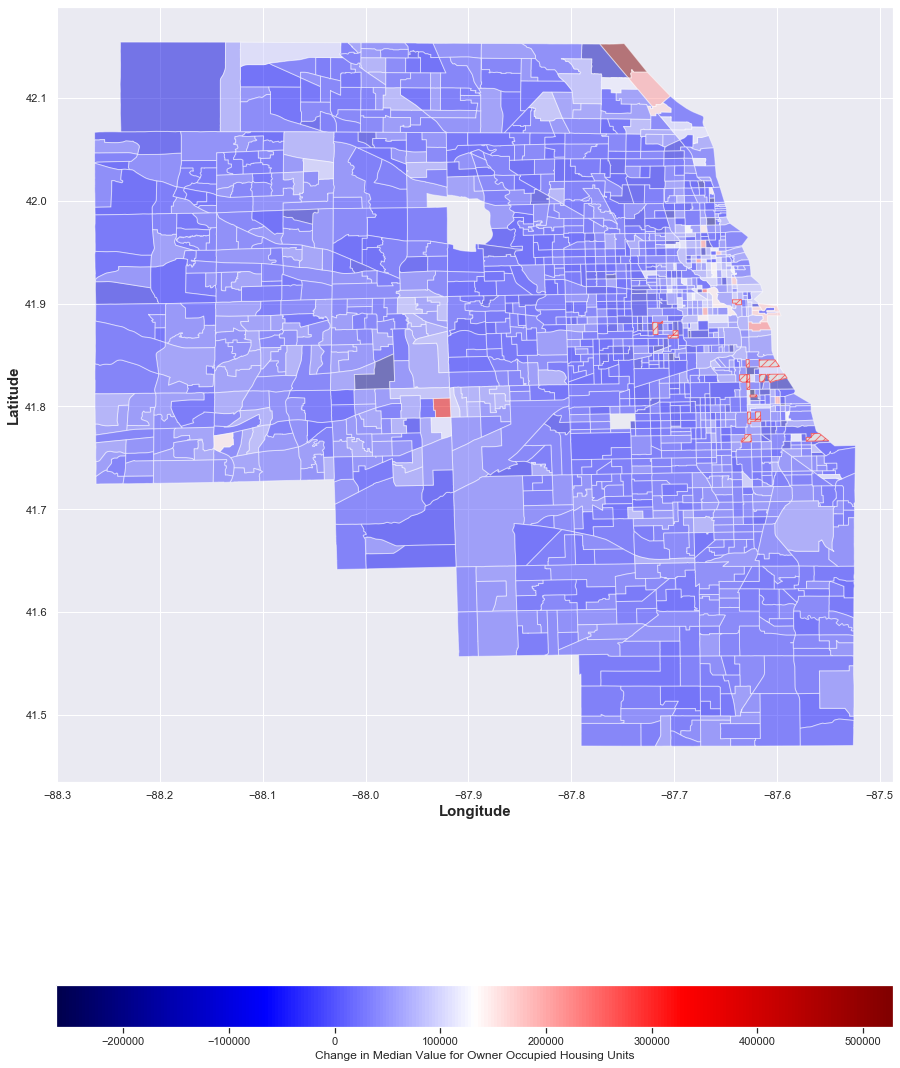

In [165]:
display_choropleth_map(city_gdf, "Median Value for Owner Occupied Housing Units", 2010, 2018, "seismic")

## Median House Value Spatial Lag

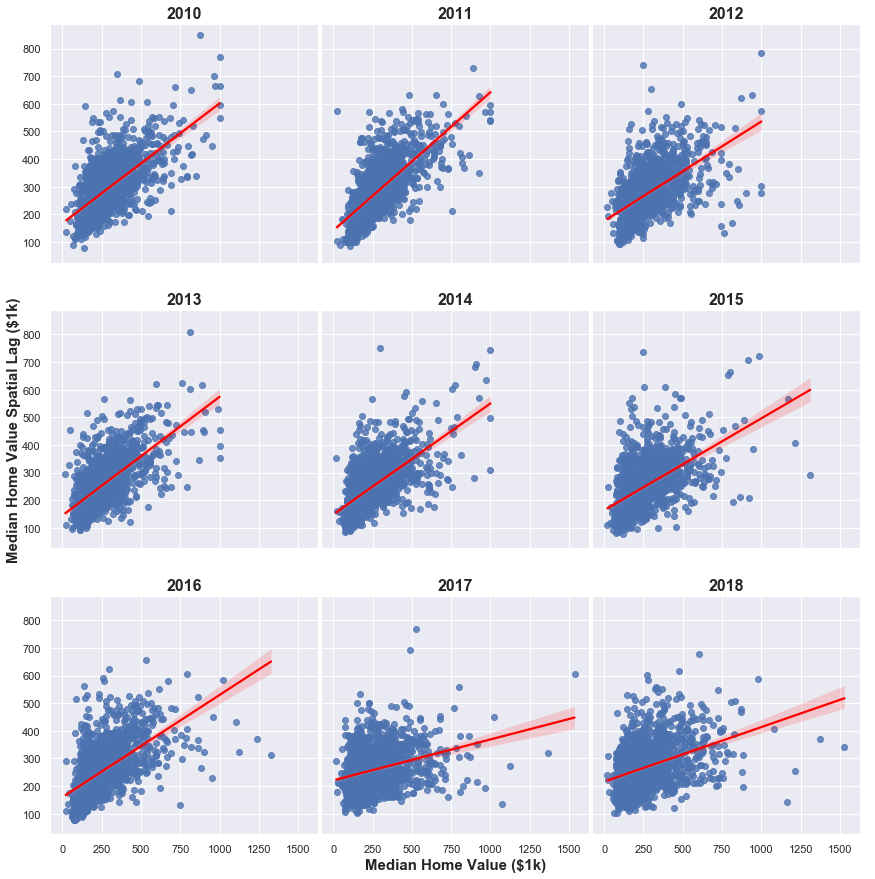

In [224]:
city_gdf["Median Home Value"] = city_gdf["Median Value for Owner Occupied Housing Units"] / 1000
city_gdf["Median Home Value Spatial Lag"] = city_gdf["Median House Value Spatial Lag"] / 1000
plot_regplot_time_lapse(city_gdf, "Median Home Value", "Median Home Value Spatial Lag")

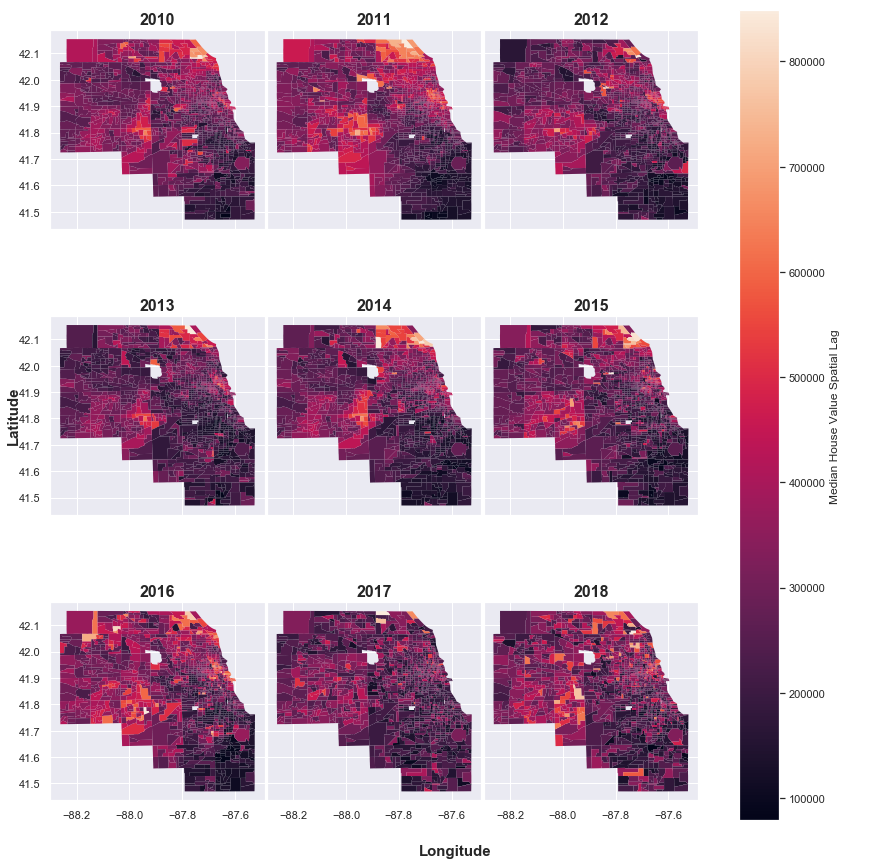

In [225]:
plot_map_time_lapse(city_gdf, "Median House Value Spatial Lag")

## Local Moran's Statistic

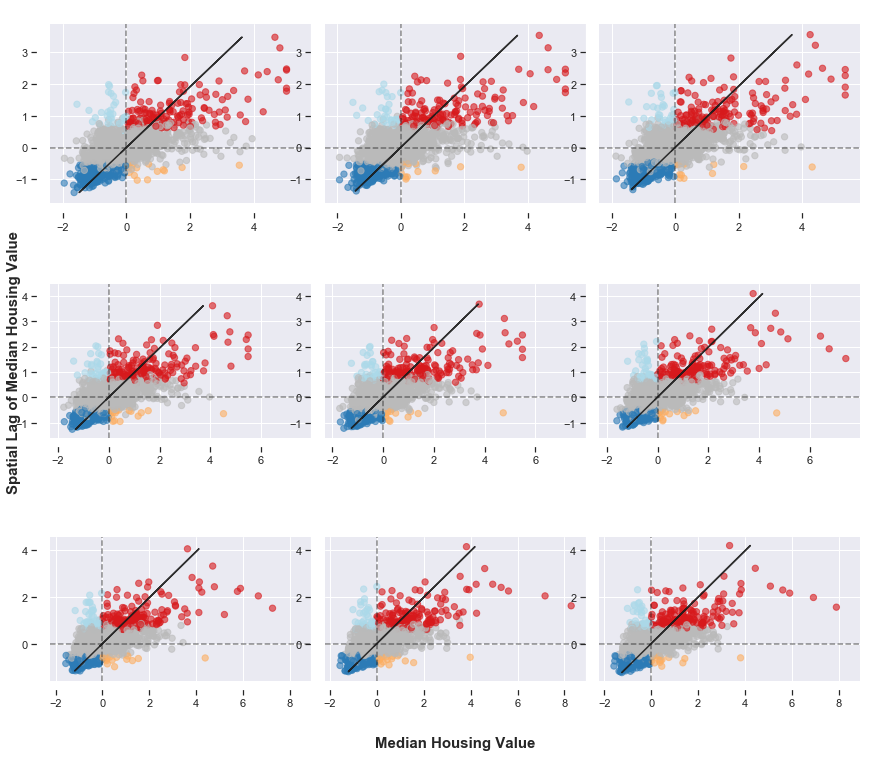

In [296]:
plot_local_moran_time_lapse(city_gdf)